In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA, FactorAnalysis
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from IPython.display import display
import warnings
warnings.filterwarnings(action="ignore")
from IPython.display import display
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# 전처리


In [ ]:
data = pd.read_csv('/content/drive/Shareddrives/[YBIGTA] Data Analytics Team/시니어 팀 프로젝트/1차 프로젝트/[2팀] 문화재청 공공빅데이터 활용 경진대회/데이터셋/데이터 최종/최종외국인친화도데이터셋(시영).csv')

In [ ]:
data.head()

,Unnamed: 0,Unnamed: 0.1,촬영지명,드라마,영화,뮤직비디오,예능,위도,경도,주소,...,최단거리관광명소,관광명소까지의 최단거리,동별 음식점 수,동별 공원 수,동별 쇼핑센터 수,도보시간,동별 숙박업소 수,외국인친화도,외국인친화도(정수),k_means_cluster
0,0,0,Busan X The Sky [부산엑스더스카이],1,0,0,0,35.159938,129.169798,"30 Dalmaji-gil, Haeundae-gu, Busan, South Kore...",...,해운대,1756,222,0.0,1.0,12,57.0,45.665794,46,0
1,1,1,Haedong Yonggungsa Temple [해동용궁사/海东龙宫寺],1,0,0,0,35.188348,129.223268,부산광역시 기장군 기장읍 용궁길 86\n(기장읍 시랑리 416-3),...,해동용궁사,0,1305,3.0,3.0,23,40.0,77.156289,77,1
2,2,2,Baetmeori Sikdang [뱃머리식당],1,0,0,0,35.090272,129.034651,부산광역시 영도구 대평로19번길 16\n(대평동1가 122-1),...,깡깡이 예술마을,387,43,0.0,0.0,19,0.0,44.455006,44,0
3,3,3,Hyein Shipbuilding [혜인선박],1,0,0,0,35.092098,129.031664,"8-5 Daepyeongnam-ro 51beon-gil, Yeongdo-gu, Bu...",...,깡깡이 예술마을,97,43,0.0,0.0,23,0.0,44.229672,44,0
4,4,4,Busan Bridge [부산대교],1,0,0,0,35.096143,129.038885,부산 중구 중앙동7가,...,"40계단, 문화관",1316,625,0.0,1.0,11,10.0,51.512369,52,0


In [ ]:
data['촬영작품수']=data.iloc[:,3:7].sum(axis=1)

In [ ]:
data.head()

,Unnamed: 0,Unnamed: 0.1,촬영지명,드라마,영화,뮤직비디오,예능,위도,경도,주소,...,관광명소까지의 최단거리,동별 음식점 수,동별 공원 수,동별 쇼핑센터 수,도보시간,동별 숙박업소 수,외국인친화도,외국인친화도(정수),k_means_cluster,촬영작품수
0,0,0,Busan X The Sky [부산엑스더스카이],1,0,0,0,35.159938,129.169798,"30 Dalmaji-gil, Haeundae-gu, Busan, South Kore...",...,1756,222,0.0,1.0,12,57.0,45.665794,46,0,1
1,1,1,Haedong Yonggungsa Temple [해동용궁사/海东龙宫寺],1,0,0,0,35.188348,129.223268,부산광역시 기장군 기장읍 용궁길 86\n(기장읍 시랑리 416-3),...,0,1305,3.0,3.0,23,40.0,77.156289,77,1,1
2,2,2,Baetmeori Sikdang [뱃머리식당],1,0,0,0,35.090272,129.034651,부산광역시 영도구 대평로19번길 16\n(대평동1가 122-1),...,387,43,0.0,0.0,19,0.0,44.455006,44,0,1
3,3,3,Hyein Shipbuilding [혜인선박],1,0,0,0,35.092098,129.031664,"8-5 Daepyeongnam-ro 51beon-gil, Yeongdo-gu, Bu...",...,97,43,0.0,0.0,23,0.0,44.229672,44,0,1
4,4,4,Busan Bridge [부산대교],1,0,0,0,35.096143,129.038885,부산 중구 중앙동7가,...,1316,625,0.0,1.0,11,10.0,51.512369,52,0,1


In [ ]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', '촬영지명', '드라마', '영화', '뮤직비디오', '예능', '위도',
       '경도', '주소', '동', '최단거리안내소', '안내소까지의 최단거리', '최단거리관광명소', '관광명소까지의 최단거리',
       '동별 음식점 수', '동별 공원 수', '동별 쇼핑센터 수', '도보시간', '동별 숙박업소 수', '외국인친화도',
       '외국인친화도(정수)', 'k_means_cluster', '촬영작품수'],
      dtype='object')

In [ ]:
data.drop(columns =['Unnamed: 0','Unnamed: 0.1','촬영지명','드라마', '영화', '뮤직비디오', '예능', '위도',
       '경도', '주소', '동', '최단거리안내소','최단거리관광명소','외국인친화도',
       '외국인친화도(정수)', 'k_means_cluster' ],inplace=True)

In [ ]:
data.head()

,안내소까지의 최단거리,관광명소까지의 최단거리,동별 음식점 수,동별 공원 수,동별 쇼핑센터 수,도보시간,동별 숙박업소 수,촬영작품수
0,1638,1756,222,0.0,1.0,12,57.0,1
1,3547,0,1305,3.0,3.0,23,40.0,1
2,968,387,43,0.0,0.0,19,0.0,1
3,1143,97,43,0.0,0.0,23,0.0,1
4,1067,1316,625,0.0,1.0,11,10.0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   안내소까지의 최단거리   43 non-null     int64  
 1   관광명소까지의 최단거리  43 non-null     int64  
 2   동별 음식점 수      43 non-null     int64  
 3   동별 공원 수       43 non-null     float64
 4   동별 쇼핑센터 수     43 non-null     float64
 5   도보시간          43 non-null     int64  
 6   동별 숙박업소 수     43 non-null     float64
 7   촬영작품수         43 non-null     int64  
dtypes: float64(3), int64(5)
memory usage: 2.8 KB


In [ ]:
data.isnull().sum()

안내소까지의 최단거리     0
관광명소까지의 최단거리    0
동별 음식점 수        0
동별 공원 수         0
동별 쇼핑센터 수       0
도보시간            0
동별 숙박업소 수       0
촬영작품수           0
dtype: int64

# 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler().fit_transform(data)
scaled = pd.DataFrame(scaled, columns = data.columns)
scaled.describe()

,안내소까지의 최단거리,관광명소까지의 최단거리,동별 음식점 수,동별 공원 수,동별 쇼핑센터 수,도보시간,동별 숙박업소 수,촬영작품수
count,4.300000e+01,43.000000,4.300000e+01,4.300000e+01,4.300000e+01,4.300000e+01,4.300000e+01,4.300000e+01
mean,1.032766e-17,0.000000,-8.778508e-17,-5.163828e-18,9.294890e-17,-2.323723e-17,-9.811273e-17,1.032766e-17
std,1.011835e+00,1.011835,1.011835e+00,1.011835e+00,1.011835e+00,1.011835e+00,1.011835e+00,1.011835e+00
min,-9.883823e-01,-0.774432,-1.187930e+00,-6.049352e-01,-7.214793e-01,-1.126221e+00,-8.848912e-01,-5.055376e-01
25%,-6.664733e-01,-0.662185,-7.797886e-01,-6.049352e-01,-7.214793e-01,-6.498847e-01,-8.449224e-01,-5.055376e-01
50%,-3.891113e-01,-0.418552,-2.057712e-01,-6.049352e-01,-7.214793e-01,-3.323274e-01,-5.651406e-01,-5.055376e-01
75%,3.275426e-01,0.396142,5.461261e-01,4.789071e-01,1.169966e-01,4.615658e-01,6.339242e-01,-5.732900e-02
max,2.541236e+00,3.924413,3.026623e+00,2.646592e+00,1.793948e+00,2.684467e+00,1.966218e+00,3.080131e+00


In [ ]:
df = scaled.copy()

# K-means 클러스터링

## K 결정

In [ ]:
from sklearn.metrics import calinski_harabasz_score, silhouette_score, silhouette_samples

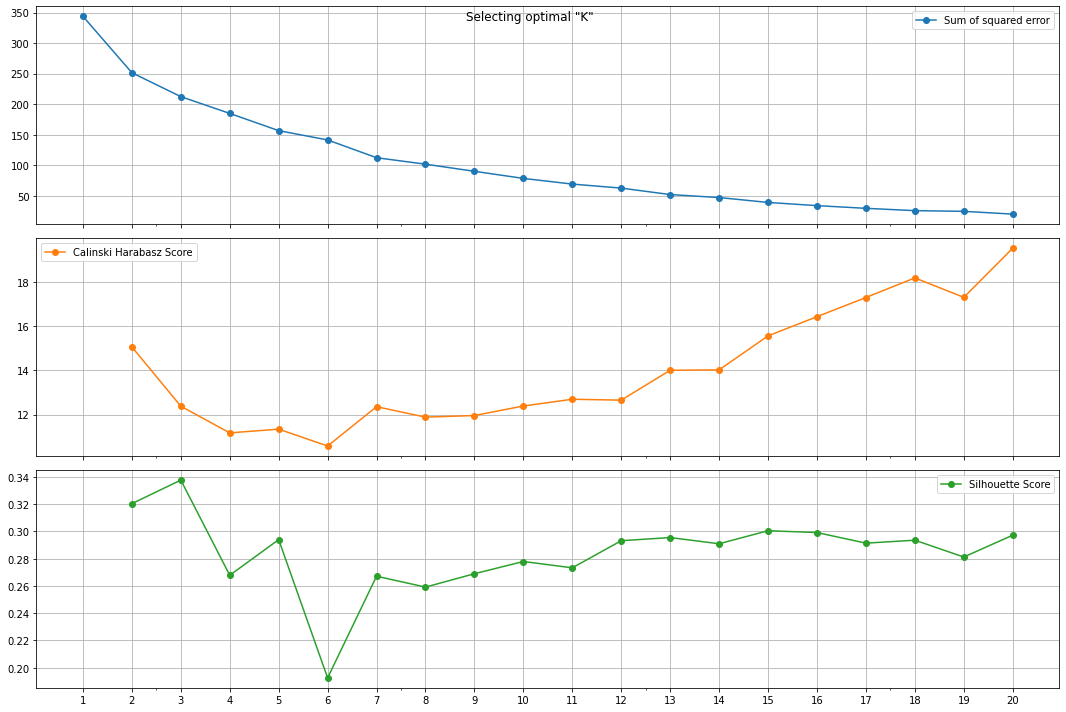

In [ ]:
search_range = range(1, 21)
report = {}
for k in search_range:
    temp_dict = {}
    kmeans = KMeans(init='k-means++',
                    algorithm='auto',
                    n_clusters=k,
                    max_iter=1000,
                    random_state=1,
                    verbose=0).fit(df)
    inertia = kmeans.inertia_
    temp_dict['Sum of squared error'] = inertia
    try:
        cluster = kmeans.predict(df)
        chs = calinski_harabasz_score(df, cluster)
        ss = silhouette_score(df, cluster)
        temp_dict['Calinski Harabasz Score'] = chs
        temp_dict['Silhouette Score'] = ss
        report[k] = temp_dict
    except:
        report[k] = temp_dict

report_df = pd.DataFrame(report).T
report_df.plot(figsize=(15, 10),
               xticks=search_range,
               grid=True,
               title=f'Selecting optimal "K"',
               subplots=True,
               marker='o',
               sharex=True)
plt.tight_layout()

2개로 결정

In [ ]:
df = scaled.copy()

In [ ]:
df.rename(columns={'안내소까지의 최단거리':'minInformation'},inplace=True)
df.rename(columns={'관광명소까지의 최단거리':'minTouristSpot'},inplace=True)
df.rename(columns={'동별 음식점 수':'restaurant'},inplace=True)
df.rename(columns={'동별 공원 수':'park'},inplace=True)
df.rename(columns={'동별 쇼핑센터 수':'shop'},inplace=True)
df.rename(columns={'도보시간':'minWalkingTime'},inplace=True)
df.rename(columns={'동별 숙박업소 수':'accommodation'},inplace=True)
df.rename(columns={'촬영작품수':'filmNum'},inplace=True)

## 클러스터링 하기

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=312, algorithm='auto')
model.fit(df)

KMeans(n_clusters=3, random_state=312)

In [ ]:
# 각 군집(cluster) 표시
pred = model.predict(df)
pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1,
       1, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1],
      dtype=int32)

In [ ]:
# 군집별 centroids의 좌표값
centroids = model.cluster_centers_
centroids = pd.DataFrame(centroids, columns = df.columns)

In [ ]:
#from sklearn.metrics import silhouette_samples, silhouette_score
df['k_means_cluster'] = pred
df['k_silhouette_coeff'] = silhouette_samples(df, df['k_means_cluster'])

k_average_score = silhouette_score(df, df['k_means_cluster'])
print('Average Silhouette Score:{0:.3f}'.format(k_average_score))

Average Silhouette Score:0.353


In [ ]:
# 군집별 평균 silhouette_score 값
df.groupby('k_means_cluster')['k_silhouette_coeff'].mean()

k_means_cluster
0    0.287281
1    0.389647
2    0.117302
Name: k_silhouette_coeff, dtype: float64

In [ ]:
vals = [0.427993,0.343519,0.771089, 0.370242]
num_var = np.var(vals) 
std = np.std(vals)
print("군집별 Silhouetter_score 분산은 ",num_var)
print("군집별 Silhouetter_score 표준편차는 ",std)

군집별 Silhouetter_score 분산은  0.0295246525581875
군집별 Silhouetter_score 표준편차는  0.17182739175750616


## EDA/Interpretation

In [ ]:
# 군집별 통계
df.groupby('k_means_cluster').mean()

,minInformation,minTouristSpot,restaurant,park,shop,minWalkingTime,accommodation,filmNum,k_silhouette_coeff
k_means_cluster,,,,,,,,,
0,0.273956,-0.332272,1.220979,1.454365,1.542406,0.366299,0.879066,-0.124560,0.287281
1,-0.153905,-0.125713,-0.396782,-0.465085,-0.451003,-0.204280,-0.236795,-0.057329,0.389647
2,1.015745,3.609916,0.045225,-0.063014,-0.721479,1.334848,-0.725016,1.511401,0.117302


In [ ]:
df.groupby('k_means_cluster').std()

,minInformation,minTouristSpot,restaurant,park,shop,minWalkingTime,accommodation,filmNum,k_silhouette_coeff
k_means_cluster,,,,,,,,,
0,0.825050,0.539098,0.840267,1.077804,0.795448,1.074806,0.920456,0.991308,0.118778
1,1.043998,0.646261,0.695669,0.369349,0.453454,0.871037,0.909334,0.902002,0.114762
2,0.792086,0.444767,1.527881,0.766392,0.000000,1.908649,0.226098,2.218519,0.083355


In [ ]:
from pandas.plotting import parallel_coordinates

In [ ]:
palette = sns.color_palette("bright", 10)

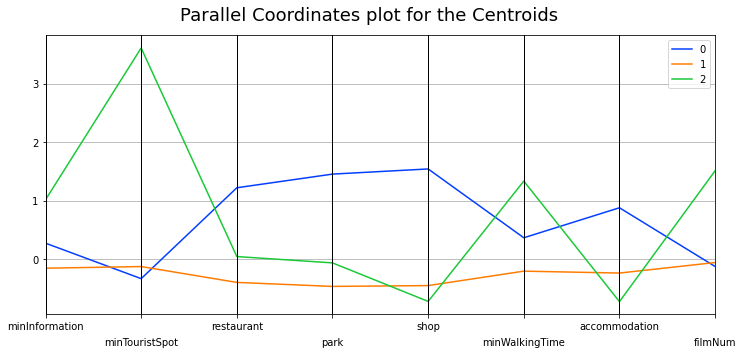

In [ ]:
# Create a data frame containing our centroids
'''https://github.com/OpenClassrooms-Student-Center/Multivariate-Exploratory-Analysis/blob/master/3a.%20K-Means%20Clustering.ipynb'''
centroids['cluster'] = centroids.index

def display_parallel_coordinates_centroids(df, num_clusters):
    '''Display a parallel coordinates plot for the centroids in df'''

    # Create the plot
    fig = plt.figure(figsize=(12, 5))
    title = fig.suptitle("Parallel Coordinates plot for the Centroids", fontsize=18)
    fig.subplots_adjust(top=0.9, wspace=0)

    # Draw the chart
    parallel_coordinates(df, 'cluster', color=palette)

    # Stagger the axes
    ax=plt.gca()
    for tick in ax.xaxis.get_major_ticks()[1::2]:
        tick.set_pad(20)    

display_parallel_coordinates_centroids(centroids, 3)

In [ ]:
df['k_means_cluster'].unique()

array([1, 0, 2], dtype=int32)

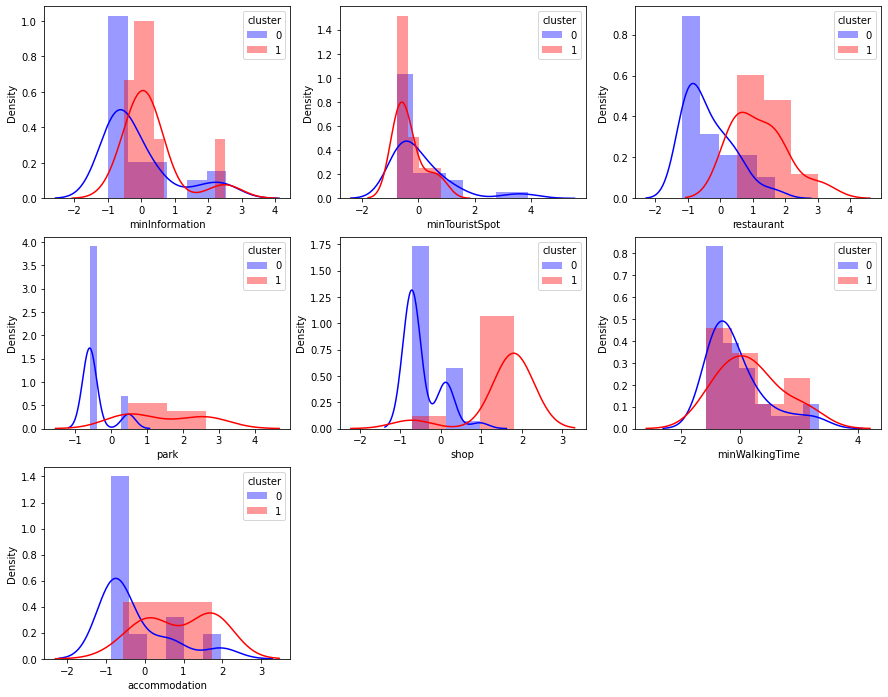

In [ ]:
# 시각화방법 1
#import seaborn as sns
#import matplotlib.pyplot as plt

plt.figure(figsize=(15,12)) 
plt.subplot(3,3,1) 
sns.distplot(df[df.k_means_cluster == 0]["minInformation"], 
             color="blue", label=0)
sns.distplot(df[df.k_means_cluster == 1]["minInformation"], 
             color="red", label=1)
plt.legend(title="cluster")


plt.subplot(3,3,2) 
sns.distplot(df[df.k_means_cluster == 0]["minTouristSpot"], 
             color="blue", label=0)
sns.distplot(df[df.k_means_cluster == 1]["minTouristSpot"], 
             color="red", label=1)
plt.legend(title="cluster")


plt.subplot(3,3,3)
sns.distplot(df[df.k_means_cluster == 0]["restaurant"], 
             color="blue", label=0)
sns.distplot(df[df.k_means_cluster == 1]["restaurant"], 
             color="red", label=1)
plt.legend(title="cluster")


plt.subplot(3,3,4)
sns.distplot(df[df.k_means_cluster == 0]["park"], 
             color="blue", label=0)
sns.distplot(df[df.k_means_cluster == 1]["park"], 
             color="red", label=1)
plt.legend(title="cluster")

plt.subplot(3,3,5)
sns.distplot(df[df.k_means_cluster == 0]["shop"], 
             color="blue", label=0)
sns.distplot(df[df.k_means_cluster == 1]["shop"], 
             color="red", label=1)
plt.legend(title="cluster")

plt.subplot(3,3,6)
sns.distplot(df[df.k_means_cluster == 0]["minWalkingTime"], 
             color="blue", label=0)
sns.distplot(df[df.k_means_cluster == 1]["minWalkingTime"], 
             color="red", label=1)
plt.legend(title="cluster")

plt.subplot(3,3,7)
sns.distplot(df[df.k_means_cluster == 0]["accommodation"], 
             color="blue", label=0)
sns.distplot(df[df.k_means_cluster == 1]["accommodation"], 
             color="red", label=1)
plt.legend(title="cluster")

plt.show()

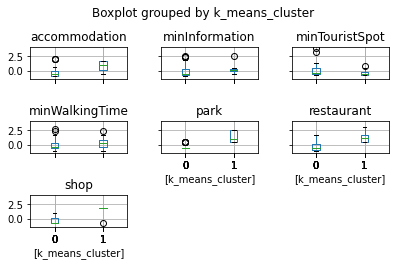

In [ ]:
# 시각화방법 2
df.drop('k_silhouette_coeff', axis=1).boxplot(by='k_means_cluster')
plt.tight_layout(pad=3, h_pad=1)
plt.show()

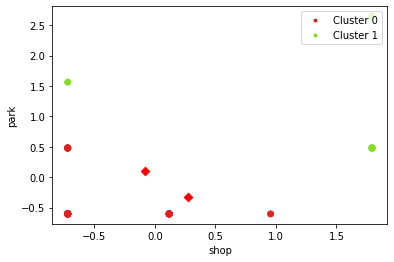

In [ ]:
# create a list of legend elemntes
## markers / records
# define and map colors
colors = ['#DF2020', '#81DF20']
df['c'] = df.k_means_cluster.map({0:colors[0], 1:colors[1]})
# 군집결과 시각화
plt.scatter(x=df['shop'], y=df['park'], c=df.c)
plt.scatter(x=centroids.iloc[:,0], y=centroids.iloc[:,1], marker='D', c='r') 
plt.xlabel('shop')
plt.ylabel('park')
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
# plot legend
plt.legend(handles=legend_elements, loc='upper right')

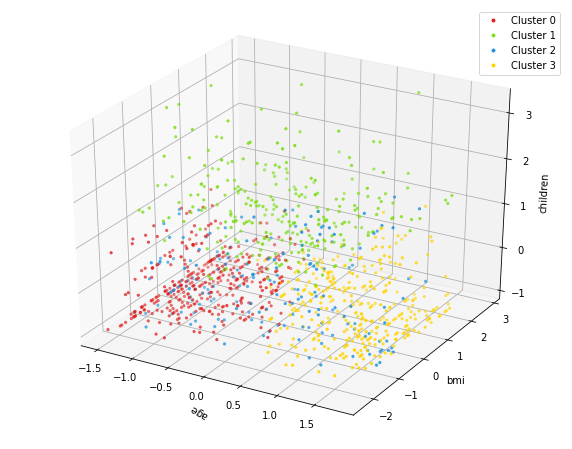

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection = '3d')

ax.scatter(df['age'], df['bmi'], df['children'], s=5, c = df.c)
ax.set_xlabel('age', rotation=150)
ax.set_ylabel('bmi')
ax.set_zlabel(r'children', rotation=60)
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
# plot legend
plt.legend(handles=legend_elements, loc='upper right')

children, age, bmi를 변수로 3차원 scatter plot을 그려 보았을 때, 군집0, 군집1, 군집3 이 잘 분리된 것을 확인할 수 있다. 군집 2는 흩어진 정도가 커 명확하게 분리되지 않은 모습이다.

In [ ]:
df_w_cat = df.copy()
df_w_cat['sex'] = data['sex']
df_w_cat['smoker'] = data['smoker']
df_w_cat['region'] = data['region']
df_w_cat.drop('c',axis=1)

,age,bmi,children,charges,k_means_cluster,k_silhouette_coeff,sex,smoker,region
0,-1.424190,-0.356784,-0.894220,0.972086,2,0.241896,female,yes,southwest
1,-1.495361,0.643537,-0.071814,-1.137965,0,0.466012,male,no,southeast
2,-0.783654,0.512320,1.572998,-0.758821,1,0.335225,male,no,southeast
3,-0.427801,-1.242076,-0.894220,1.681898,2,0.369444,male,no,northwest
4,-0.498972,-0.189779,-0.894220,-0.839914,0,0.572817,male,no,northwest
...,...,...,...,...,...,...,...,...,...
1186,0.782101,0.166382,1.572998,0.097356,1,0.489940,male,no,northwest
1187,-1.495361,0.328274,-0.894220,-1.071094,0,0.589618,female,no,northeast
1188,-1.495361,1.168407,-0.894220,-1.151288,0,0.493772,female,no,southeast
1189,-1.281849,-0.714650,-0.894220,-1.098658,0,0.601780,female,no,southwest


In [ ]:
df_w_cat.drop('c',axis=1,inplace=True)

In [ ]:
df_w_cat

,age,bmi,children,charges,k_means_cluster,k_silhouette_coeff,sex,smoker,region
0,-1.424190,-0.356784,-0.894220,0.972086,2,0.241896,female,yes,southwest
1,-1.495361,0.643537,-0.071814,-1.137965,0,0.466012,male,no,southeast
2,-0.783654,0.512320,1.572998,-0.758821,1,0.335225,male,no,southeast
3,-0.427801,-1.242076,-0.894220,1.681898,2,0.369444,male,no,northwest
4,-0.498972,-0.189779,-0.894220,-0.839914,0,0.572817,male,no,northwest
...,...,...,...,...,...,...,...,...,...
1186,0.782101,0.166382,1.572998,0.097356,1,0.489940,male,no,northwest
1187,-1.495361,0.328274,-0.894220,-1.071094,0,0.589618,female,no,northeast
1188,-1.495361,1.168407,-0.894220,-1.151288,0,0.493772,female,no,southeast
1189,-1.281849,-0.714650,-0.894220,-1.098658,0,0.601780,female,no,southwest


In [ ]:
cluster0 = df_w_cat[df_w_cat["k_means_cluster"]==0]
cluster1 = df_w_cat[df_w_cat["k_means_cluster"]==1]
cluster2 = df_w_cat[df_w_cat["k_means_cluster"]==2]
cluster3 = df_w_cat[df_w_cat["k_means_cluster"]==3]

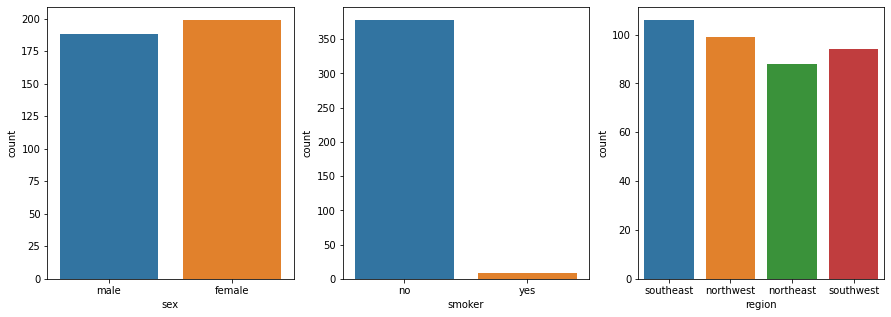

In [ ]:
f, ax = plt.subplots(1, 3, figsize = (15,5))
sns.countplot(x = "sex",data = cluster0, ax = ax[0])
sns.countplot(x = "smoker",data = cluster0, ax = ax[1])
sns.countplot(x = "region",data = cluster0, ax = ax[2])
pass

각 변수별로 군집의 특성을 파악하기 위해 subplots를 그려 확인하였다. 위 그래프는 sex, smoker, region에 따른 데이터 분류이고, 각각 (female, male), (smoker, no smoker), (southeast, northeast, northwest, southwest) 로 분류되었다. 군집0은 남성보다 여성이 많고, 비흡연자의 수가 흡연자의 수에 비해 월등히 높았으며, 거주지는 southeast, northwest, southwest, northeast 순으로 빈도수가 높았다.

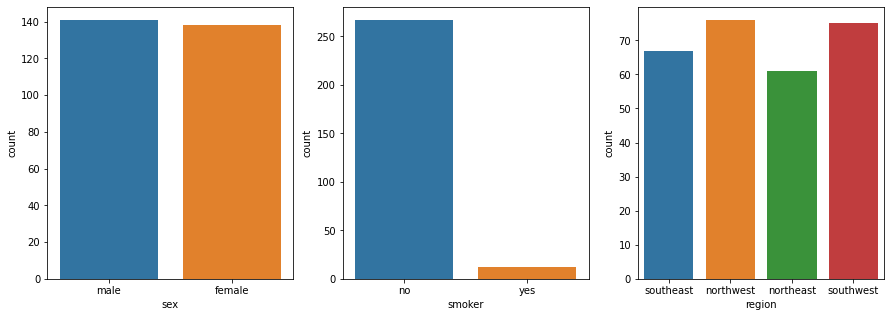

In [ ]:
f, ax = plt.subplots(1, 3, figsize = (15,5))
sns.countplot(x = "sex",data = cluster1, ax = ax[0])
sns.countplot(x = "smoker",data = cluster1, ax = ax[1])
sns.countplot(x = "region",data = cluster1, ax = ax[2])
pass

군집1은 남성이 여성보다 약간 많고, 비흡연자의 수가 흡연자의 수에 비해 월등히 높았으며, 거주지는 southwest, northwest, southeast, northeast 순으로 빈도수가 높았다.

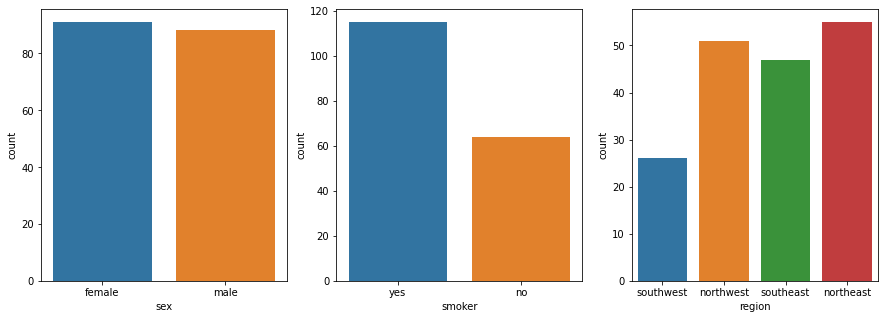

In [ ]:
f, ax = plt.subplots(1, 3, figsize = (15,5))
sns.countplot(x = "sex",data = cluster2, ax = ax[0])
sns.countplot(x = "smoker",data = cluster2, ax = ax[1])
sns.countplot(x = "region",data = cluster2, ax = ax[2])
pass


군집2는 여성이 남성보다 약간 많고, 흡연자가 비흡연자보다 많았으며, 거주지는 northeast, northwest, southeast, southwest 순으로 빈도수가 높았다.



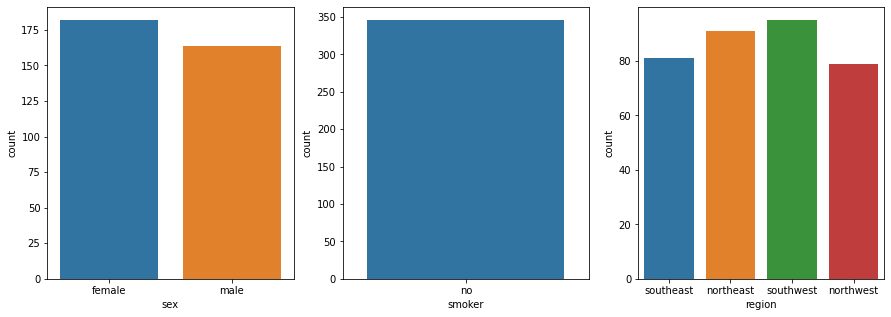

In [ ]:
f, ax = plt.subplots(1, 3, figsize = (15,5))
sns.countplot(x = "sex",data = cluster3, ax = ax[0])
sns.countplot(x = "smoker",data = cluster3, ax = ax[1])
sns.countplot(x = "region",data = cluster3, ax = ax[2])
pass

군집3은 여성이 남성보다 약간 많고, 흡연자가 아예 없었으며, 거주지는 southwest, northeast,southeast,northwest 순으로 빈도수가 높았다.

# K-means 클러스터링

## K 결정

In [ ]:
from sklearn.metrics import calinski_harabasz_score, silhouette_score, silhouette_samples

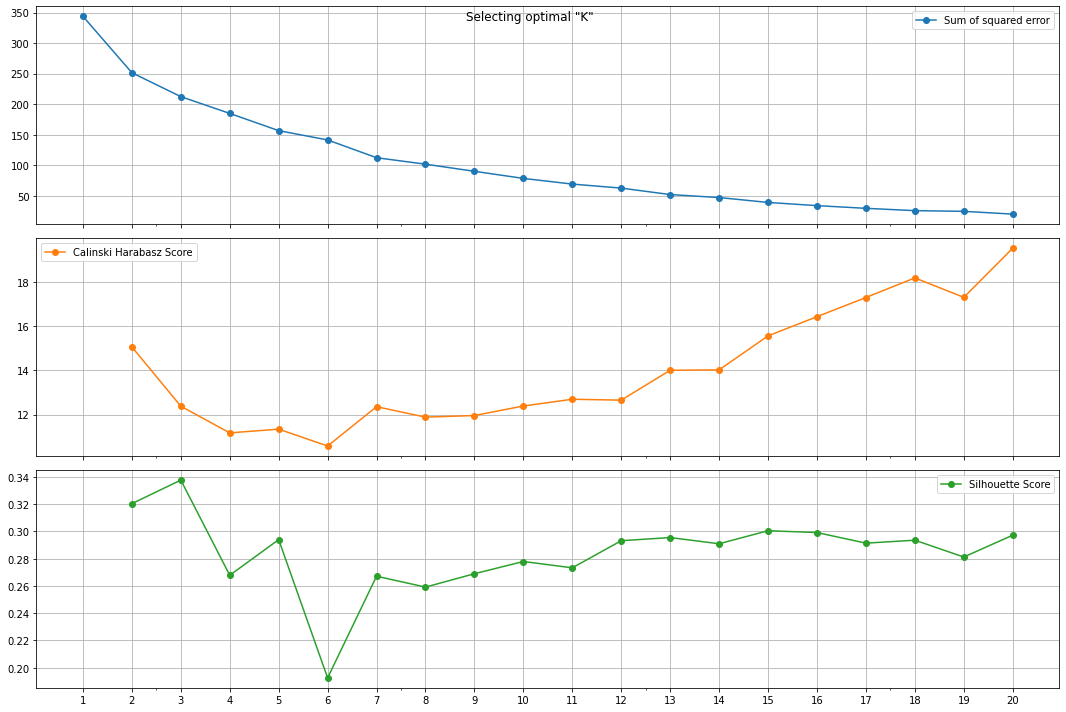

In [ ]:
search_range = range(1, 21)
report = {}
for k in search_range:
    temp_dict = {}
    kmeans = KMeans(init='k-means++',
                    algorithm='auto',
                    n_clusters=k,
                    max_iter=1000,
                    random_state=1,
                    verbose=0).fit(df)
    inertia = kmeans.inertia_
    temp_dict['Sum of squared error'] = inertia
    try:
        cluster = kmeans.predict(df)
        chs = calinski_harabasz_score(df, cluster)
        ss = silhouette_score(df, cluster)
        temp_dict['Calinski Harabasz Score'] = chs
        temp_dict['Silhouette Score'] = ss
        report[k] = temp_dict
    except:
        report[k] = temp_dict

report_df = pd.DataFrame(report).T
report_df.plot(figsize=(15, 10),
               xticks=search_range,
               grid=True,
               title=f'Selecting optimal "K"',
               subplots=True,
               marker='o',
               sharex=True)
plt.tight_layout()

2개로 결정

In [ ]:
df = scaled.copy()

In [ ]:
df.rename(columns={'안내소까지의 최단거리':'minInformation'},inplace=True)
df.rename(columns={'관광명소까지의 최단거리':'minTouristSpot'},inplace=True)
df.rename(columns={'동별 음식점 수':'restaurant'},inplace=True)
df.rename(columns={'동별 공원 수':'park'},inplace=True)
df.rename(columns={'동별 쇼핑센터 수':'shop'},inplace=True)
df.rename(columns={'도보시간':'minWalkingTime'},inplace=True)
df.rename(columns={'동별 숙박업소 수':'accommodation'},inplace=True)
df.rename(columns={'촬영작품수':'filmNum'},inplace=True)

## 클러스터링 하기

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, random_state=312, algorithm='auto')
model.fit(df)

KMeans(n_clusters=2, random_state=312)

In [ ]:
# 각 군집(cluster) 표시
pred = model.predict(df)
pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0],
      dtype=int32)

In [ ]:
# 군집별 centroids의 좌표값
centroids = model.cluster_centers_
centroids = pd.DataFrame(centroids, columns = df.columns)

In [ ]:
#from sklearn.metrics import silhouette_samples, silhouette_score
df['k_means_cluster'] = pred
df['k_silhouette_coeff'] = silhouette_samples(df, df['k_means_cluster'])

k_average_score = silhouette_score(df, df['k_means_cluster'])
print('Average Silhouette Score:{0:.3f}'.format(k_average_score))

Average Silhouette Score:0.335


In [ ]:
# 군집별 평균 silhouette_score 값
df.groupby('k_means_cluster')['k_silhouette_coeff'].mean()

k_means_cluster
0    0.345650
1    0.303486
Name: k_silhouette_coeff, dtype: float64

In [ ]:
vals = [0.427993,0.343519,0.771089, 0.370242]
num_var = np.var(vals) 
std = np.std(vals)
print("군집별 Silhouetter_score 분산은 ",num_var)
print("군집별 Silhouetter_score 표준편차는 ",std)

군집별 Silhouetter_score 분산은  0.0295246525581875
군집별 Silhouetter_score 표준편차는  0.17182739175750616


## EDA/Interpretation

In [ ]:
# 군집별 통계
df.groupby('k_means_cluster').mean()

,minInformation,minTouristSpot,restaurant,park,shop,minWalkingTime,accommodation,filmNum,k_silhouette_coeff
k_means_cluster,,,,,,,,,
0,-0.083017,0.100689,-0.369993,-0.440717,-0.467396,-0.111000,-0.266384,0.037746,0.345650
1,0.273956,-0.332272,1.220979,1.454365,1.542406,0.366299,0.879066,-0.124560,0.303486


In [ ]:
df.groupby('k_means_cluster').std()

,minInformation,minTouristSpot,restaurant,park,shop,minWalkingTime,accommodation,filmNum,k_silhouette_coeff
k_means_cluster,,,,,,,,,
0,1.059122,1.103202,0.733573,0.394637,0.443920,0.981943,0.889269,1.030073,0.115261
1,0.825050,0.539098,0.840267,1.077804,0.795448,1.074806,0.920456,0.991308,0.117879


In [ ]:
from pandas.plotting import parallel_coordinates

In [ ]:
palette = sns.color_palette("bright", 10)

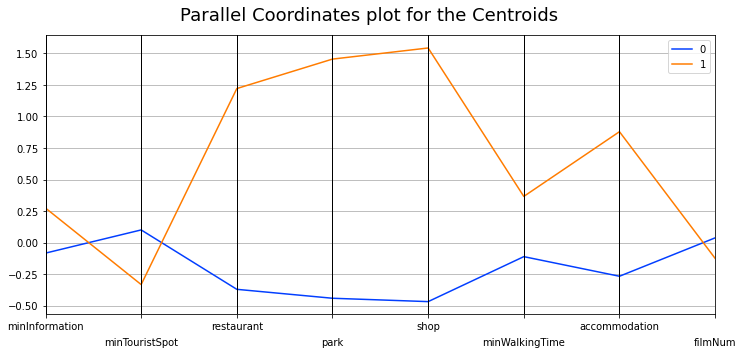

In [ ]:
# Create a data frame containing our centroids
'''https://github.com/OpenClassrooms-Student-Center/Multivariate-Exploratory-Analysis/blob/master/3a.%20K-Means%20Clustering.ipynb'''
centroids['cluster'] = centroids.index

def display_parallel_coordinates_centroids(df, num_clusters):
    '''Display a parallel coordinates plot for the centroids in df'''

    # Create the plot
    fig = plt.figure(figsize=(12, 5))
    title = fig.suptitle("Parallel Coordinates plot for the Centroids", fontsize=18)
    fig.subplots_adjust(top=0.9, wspace=0)

    # Draw the chart
    parallel_coordinates(df, 'cluster', color=palette)

    # Stagger the axes
    ax=plt.gca()
    for tick in ax.xaxis.get_major_ticks()[1::2]:
        tick.set_pad(20)    

display_parallel_coordinates_centroids(centroids, 3)

In [ ]:
df['k_means_cluster'].unique()

array([1, 0, 2], dtype=int32)

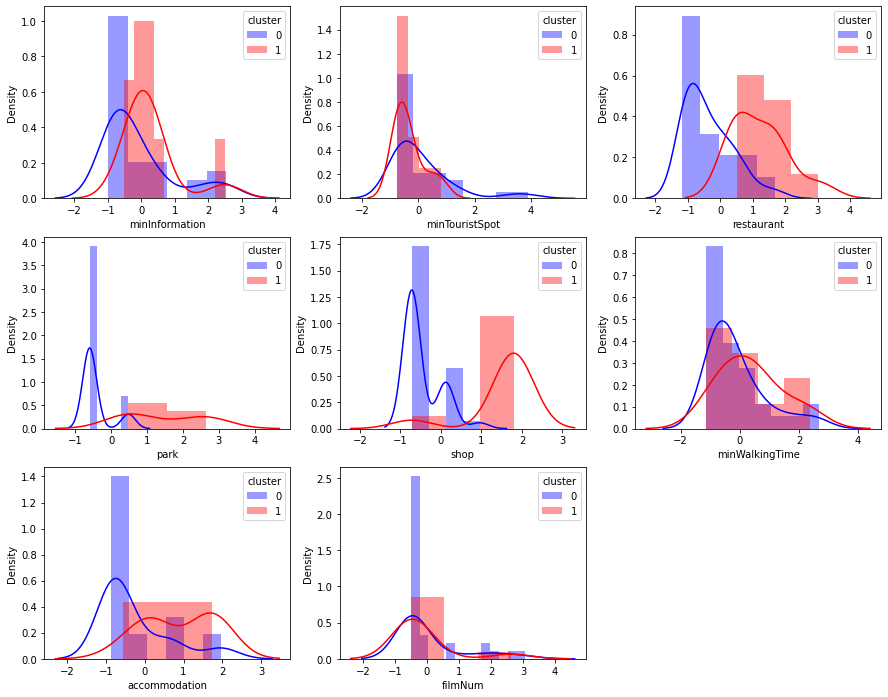

In [ ]:
# 시각화방법 1
#import seaborn as sns
#import matplotlib.pyplot as plt

plt.figure(figsize=(15,12)) 
plt.subplot(3,3,1) 
sns.distplot(df[df.k_means_cluster == 0]["minInformation"], 
             color="blue", label=0)
sns.distplot(df[df.k_means_cluster == 1]["minInformation"], 
             color="red", label=1)
plt.legend(title="cluster")


plt.subplot(3,3,2) 
sns.distplot(df[df.k_means_cluster == 0]["minTouristSpot"], 
             color="blue", label=0)
sns.distplot(df[df.k_means_cluster == 1]["minTouristSpot"], 
             color="red", label=1)
plt.legend(title="cluster")


plt.subplot(3,3,3)
sns.distplot(df[df.k_means_cluster == 0]["restaurant"], 
             color="blue", label=0)
sns.distplot(df[df.k_means_cluster == 1]["restaurant"], 
             color="red", label=1)
plt.legend(title="cluster")


plt.subplot(3,3,4)
sns.distplot(df[df.k_means_cluster == 0]["park"], 
             color="blue", label=0)
sns.distplot(df[df.k_means_cluster == 1]["park"], 
             color="red", label=1)
plt.legend(title="cluster")

plt.subplot(3,3,5)
sns.distplot(df[df.k_means_cluster == 0]["shop"], 
             color="blue", label=0)
sns.distplot(df[df.k_means_cluster == 1]["shop"], 
             color="red", label=1)
plt.legend(title="cluster")

plt.subplot(3,3,6)
sns.distplot(df[df.k_means_cluster == 0]["minWalkingTime"], 
             color="blue", label=0)
sns.distplot(df[df.k_means_cluster == 1]["minWalkingTime"], 
             color="red", label=1)
plt.legend(title="cluster")

plt.subplot(3,3,7)
sns.distplot(df[df.k_means_cluster == 0]["accommodation"], 
             color="blue", label=0)
sns.distplot(df[df.k_means_cluster == 1]["accommodation"], 
             color="red", label=1)
plt.legend(title="cluster")

plt.subplot(3,3,8)
sns.distplot(df[df.k_means_cluster == 0]["filmNum"], 
             color="blue", label=0)
sns.distplot(df[df.k_means_cluster == 1]["filmNum"], 
             color="red", label=1)
plt.legend(title="cluster")

plt.show()

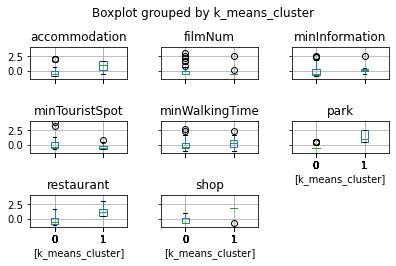

In [ ]:
# 시각화방법 2
df.drop('k_silhouette_coeff', axis=1).boxplot(by='k_means_cluster')
plt.tight_layout(pad=3, h_pad=1)
plt.show()

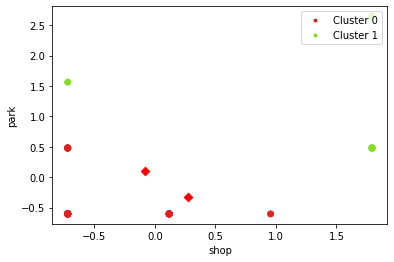

In [ ]:
# create a list of legend elemntes
## markers / records
# define and map colors
colors = ['#DF2020', '#81DF20']
df['c'] = df.k_means_cluster.map({0:colors[0], 1:colors[1]})
# 군집결과 시각화
plt.scatter(x=df['shop'], y=df['park'], c=df.c)
plt.scatter(x=centroids.iloc[:,0], y=centroids.iloc[:,1], marker='D', c='r') 
plt.xlabel('shop')
plt.ylabel('park')
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
# plot legend
plt.legend(handles=legend_elements, loc='upper right')

KeyError: ignored

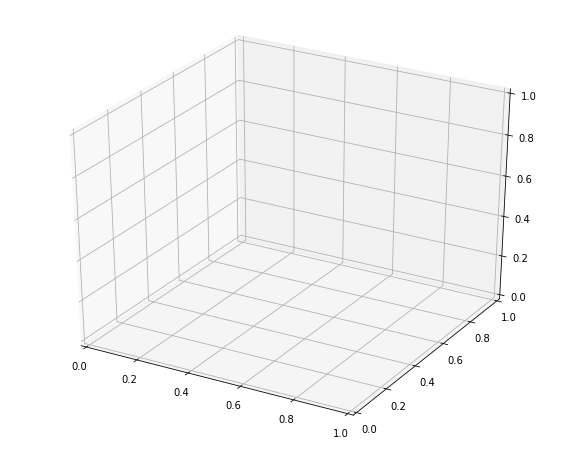

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection = '3d')

ax.scatter(df['age'], df['bmi'], df['children'], s=5, c = df.c)
ax.set_xlabel('age', rotation=150)
ax.set_ylabel('bmi')
ax.set_zlabel(r'children', rotation=60)
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
# plot legend
plt.legend(handles=legend_elements, loc='upper right')

children, age, bmi를 변수로 3차원 scatter plot을 그려 보았을 때, 군집0, 군집1, 군집3 이 잘 분리된 것을 확인할 수 있다. 군집 2는 흩어진 정도가 커 명확하게 분리되지 않은 모습이다.

In [ ]:
df_w_cat = df.copy()
df_w_cat['sex'] = data['sex']
df_w_cat['smoker'] = data['smoker']
df_w_cat['region'] = data['region']
df_w_cat.drop('c',axis=1)

,age,bmi,children,charges,k_means_cluster,k_silhouette_coeff,sex,smoker,region
0,-1.424190,-0.356784,-0.894220,0.972086,2,0.241896,female,yes,southwest
1,-1.495361,0.643537,-0.071814,-1.137965,0,0.466012,male,no,southeast
2,-0.783654,0.512320,1.572998,-0.758821,1,0.335225,male,no,southeast
3,-0.427801,-1.242076,-0.894220,1.681898,2,0.369444,male,no,northwest
4,-0.498972,-0.189779,-0.894220,-0.839914,0,0.572817,male,no,northwest
...,...,...,...,...,...,...,...,...,...
1186,0.782101,0.166382,1.572998,0.097356,1,0.489940,male,no,northwest
1187,-1.495361,0.328274,-0.894220,-1.071094,0,0.589618,female,no,northeast
1188,-1.495361,1.168407,-0.894220,-1.151288,0,0.493772,female,no,southeast
1189,-1.281849,-0.714650,-0.894220,-1.098658,0,0.601780,female,no,southwest


In [ ]:
df_w_cat.drop('c',axis=1,inplace=True)

In [ ]:
df_w_cat

,age,bmi,children,charges,k_means_cluster,k_silhouette_coeff,sex,smoker,region
0,-1.424190,-0.356784,-0.894220,0.972086,2,0.241896,female,yes,southwest
1,-1.495361,0.643537,-0.071814,-1.137965,0,0.466012,male,no,southeast
2,-0.783654,0.512320,1.572998,-0.758821,1,0.335225,male,no,southeast
3,-0.427801,-1.242076,-0.894220,1.681898,2,0.369444,male,no,northwest
4,-0.498972,-0.189779,-0.894220,-0.839914,0,0.572817,male,no,northwest
...,...,...,...,...,...,...,...,...,...
1186,0.782101,0.166382,1.572998,0.097356,1,0.489940,male,no,northwest
1187,-1.495361,0.328274,-0.894220,-1.071094,0,0.589618,female,no,northeast
1188,-1.495361,1.168407,-0.894220,-1.151288,0,0.493772,female,no,southeast
1189,-1.281849,-0.714650,-0.894220,-1.098658,0,0.601780,female,no,southwest


In [ ]:
cluster0 = df_w_cat[df_w_cat["k_means_cluster"]==0]
cluster1 = df_w_cat[df_w_cat["k_means_cluster"]==1]
cluster2 = df_w_cat[df_w_cat["k_means_cluster"]==2]
cluster3 = df_w_cat[df_w_cat["k_means_cluster"]==3]

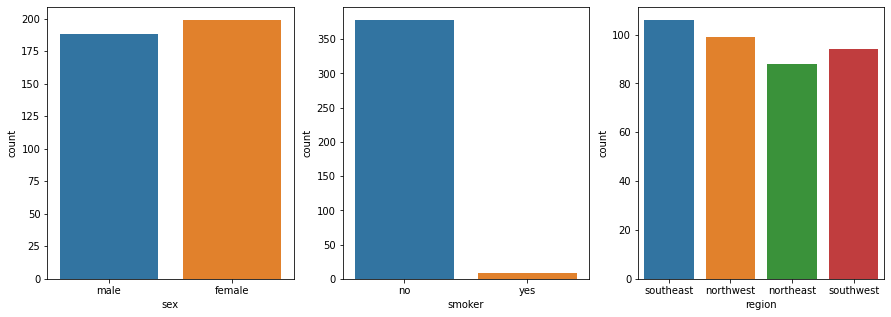

In [ ]:
f, ax = plt.subplots(1, 3, figsize = (15,5))
sns.countplot(x = "sex",data = cluster0, ax = ax[0])
sns.countplot(x = "smoker",data = cluster0, ax = ax[1])
sns.countplot(x = "region",data = cluster0, ax = ax[2])
pass

각 변수별로 군집의 특성을 파악하기 위해 subplots를 그려 확인하였다. 위 그래프는 sex, smoker, region에 따른 데이터 분류이고, 각각 (female, male), (smoker, no smoker), (southeast, northeast, northwest, southwest) 로 분류되었다. 군집0은 남성보다 여성이 많고, 비흡연자의 수가 흡연자의 수에 비해 월등히 높았으며, 거주지는 southeast, northwest, southwest, northeast 순으로 빈도수가 높았다.

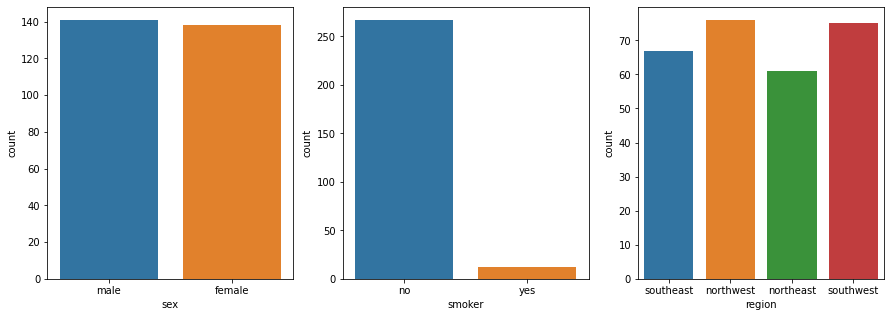

In [ ]:
f, ax = plt.subplots(1, 3, figsize = (15,5))
sns.countplot(x = "sex",data = cluster1, ax = ax[0])
sns.countplot(x = "smoker",data = cluster1, ax = ax[1])
sns.countplot(x = "region",data = cluster1, ax = ax[2])
pass

군집1은 남성이 여성보다 약간 많고, 비흡연자의 수가 흡연자의 수에 비해 월등히 높았으며, 거주지는 southwest, northwest, southeast, northeast 순으로 빈도수가 높았다.

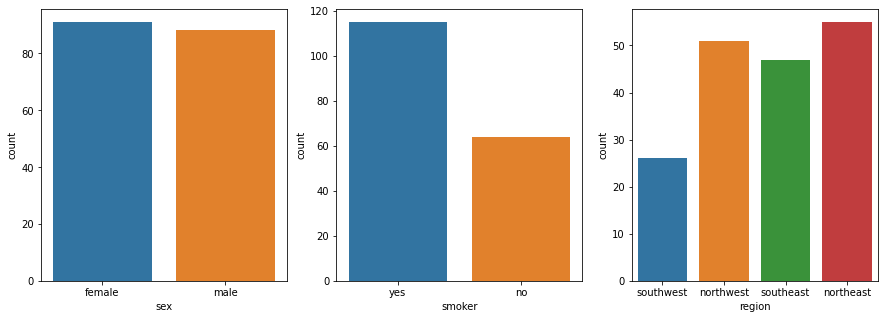

In [ ]:
f, ax = plt.subplots(1, 3, figsize = (15,5))
sns.countplot(x = "sex",data = cluster2, ax = ax[0])
sns.countplot(x = "smoker",data = cluster2, ax = ax[1])
sns.countplot(x = "region",data = cluster2, ax = ax[2])
pass


군집2는 여성이 남성보다 약간 많고, 흡연자가 비흡연자보다 많았으며, 거주지는 northeast, northwest, southeast, southwest 순으로 빈도수가 높았다.



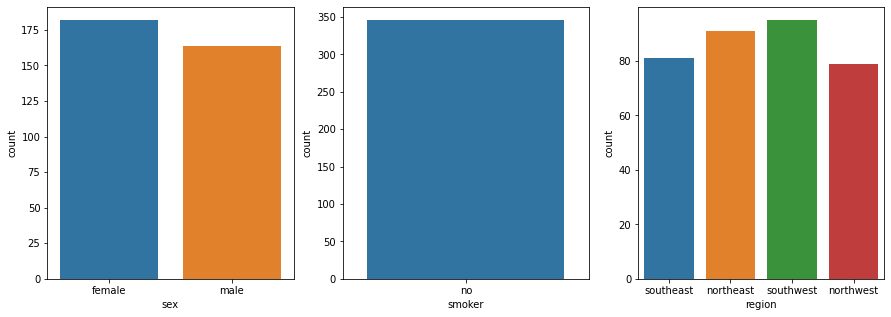

In [ ]:
f, ax = plt.subplots(1, 3, figsize = (15,5))
sns.countplot(x = "sex",data = cluster3, ax = ax[0])
sns.countplot(x = "smoker",data = cluster3, ax = ax[1])
sns.countplot(x = "region",data = cluster3, ax = ax[2])
pass

군집3은 여성이 남성보다 약간 많고, 흡연자가 아예 없었으며, 거주지는 southwest, northeast,southeast,northwest 순으로 빈도수가 높았다.

# 친화도 수정

In [ ]:
d = pd.read_csv('/content/drive/Shareddrives/[YBIGTA] Data Analytics Team/시니어 팀 프로젝트/1차 프로젝트/[2팀] 문화재청 공공빅데이터 활용 경진대회/데이터셋/데이터 최종/최종외국인친화도데이터셋(시영).csv')

In [ ]:
d.head()

,Unnamed: 0,Unnamed: 0.1,촬영지명,드라마,영화,뮤직비디오,예능,위도,경도,주소,...,최단거리관광명소,관광명소까지의 최단거리,동별 음식점 수,동별 공원 수,동별 쇼핑센터 수,도보시간,동별 숙박업소 수,외국인친화도,외국인친화도(정수),k_means_cluster
0,0,0,Busan X The Sky [부산엑스더스카이],1,0,0,0,35.159938,129.169798,"30 Dalmaji-gil, Haeundae-gu, Busan, South Kore...",...,해운대,1756,222,0.0,1.0,12,57.0,45.665794,46,0
1,1,1,Haedong Yonggungsa Temple [해동용궁사/海东龙宫寺],1,0,0,0,35.188348,129.223268,부산광역시 기장군 기장읍 용궁길 86\n(기장읍 시랑리 416-3),...,해동용궁사,0,1305,3.0,3.0,23,40.0,77.156289,77,1
2,2,2,Baetmeori Sikdang [뱃머리식당],1,0,0,0,35.090272,129.034651,부산광역시 영도구 대평로19번길 16\n(대평동1가 122-1),...,깡깡이 예술마을,387,43,0.0,0.0,19,0.0,44.455006,44,0
3,3,3,Hyein Shipbuilding [혜인선박],1,0,0,0,35.092098,129.031664,"8-5 Daepyeongnam-ro 51beon-gil, Yeongdo-gu, Bu...",...,깡깡이 예술마을,97,43,0.0,0.0,23,0.0,44.229672,44,0
4,4,4,Busan Bridge [부산대교],1,0,0,0,35.096143,129.038885,부산 중구 중앙동7가,...,"40계단, 문화관",1316,625,0.0,1.0,11,10.0,51.512369,52,0


In [ ]:
d.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', '촬영지명', '드라마', '영화', '뮤직비디오', '예능', '위도',
       '경도', '주소', '동', '최단거리안내소', '안내소까지의 최단거리', '최단거리관광명소', '관광명소까지의 최단거리',
       '동별 음식점 수', '동별 공원 수', '동별 쇼핑센터 수', '도보시간', '동별 숙박업소 수', '외국인친화도',
       '외국인친화도(정수)', 'k_means_cluster'],
      dtype='object')

In [ ]:
d.drop(columns=['Unnamed: 0', 'Unnamed: 0.1','외국인친화도',
       '외국인친화도(정수)', 'k_means_cluster'],inplace=True)

In [ ]:
d.head()

,촬영지명,드라마,영화,뮤직비디오,예능,위도,경도,주소,동,최단거리안내소,안내소까지의 최단거리,최단거리관광명소,관광명소까지의 최단거리,동별 음식점 수,동별 공원 수,동별 쇼핑센터 수,도보시간,동별 숙박업소 수
0,Busan X The Sky [부산엑스더스카이],1,0,0,0,35.159938,129.169798,"30 Dalmaji-gil, Haeundae-gu, Busan, South Kore...",중동,달맞이길 관광안내소,1638,해운대,1756,222,0.0,1.0,12,57.0
1,Haedong Yonggungsa Temple [해동용궁사/海东龙宫寺],1,0,0,0,35.188348,129.223268,부산광역시 기장군 기장읍 용궁길 86\n(기장읍 시랑리 416-3),기장읍,송정관광안내소,3547,해동용궁사,0,1305,3.0,3.0,23,40.0
2,Baetmeori Sikdang [뱃머리식당],1,0,0,0,35.090272,129.034651,부산광역시 영도구 대평로19번길 16\n(대평동1가 122-1),대평동,영도관광안내센터,968,깡깡이 예술마을,387,43,0.0,0.0,19,0.0
3,Hyein Shipbuilding [혜인선박],1,0,0,0,35.092098,129.031664,"8-5 Daepyeongnam-ro 51beon-gil, Yeongdo-gu, Bu...",대평동,영도관광안내센터,1143,깡깡이 예술마을,97,43,0.0,0.0,23,0.0
4,Busan Bridge [부산대교],1,0,0,0,35.096143,129.038885,부산 중구 중앙동7가,중앙동,영도관광안내센터,1067,"40계단, 문화관",1316,625,0.0,1.0,11,10.0


In [ ]:
d['촬영작품수']=d.iloc[:,1:5].sum(axis=1)

In [ ]:
d.head()

,촬영지명,드라마,영화,뮤직비디오,예능,위도,경도,주소,동,최단거리안내소,안내소까지의 최단거리,최단거리관광명소,관광명소까지의 최단거리,동별 음식점 수,동별 공원 수,동별 쇼핑센터 수,도보시간,동별 숙박업소 수,촬영작품수
0,Busan X The Sky [부산엑스더스카이],1,0,0,0,35.159938,129.169798,"30 Dalmaji-gil, Haeundae-gu, Busan, South Kore...",중동,달맞이길 관광안내소,1638,해운대,1756,222,0.0,1.0,12,57.0,1
1,Haedong Yonggungsa Temple [해동용궁사/海东龙宫寺],1,0,0,0,35.188348,129.223268,부산광역시 기장군 기장읍 용궁길 86\n(기장읍 시랑리 416-3),기장읍,송정관광안내소,3547,해동용궁사,0,1305,3.0,3.0,23,40.0,1
2,Baetmeori Sikdang [뱃머리식당],1,0,0,0,35.090272,129.034651,부산광역시 영도구 대평로19번길 16\n(대평동1가 122-1),대평동,영도관광안내센터,968,깡깡이 예술마을,387,43,0.0,0.0,19,0.0,1
3,Hyein Shipbuilding [혜인선박],1,0,0,0,35.092098,129.031664,"8-5 Daepyeongnam-ro 51beon-gil, Yeongdo-gu, Bu...",대평동,영도관광안내센터,1143,깡깡이 예술마을,97,43,0.0,0.0,23,0.0,1
4,Busan Bridge [부산대교],1,0,0,0,35.096143,129.038885,부산 중구 중앙동7가,중앙동,영도관광안내센터,1067,"40계단, 문화관",1316,625,0.0,1.0,11,10.0,1


In [ ]:
dd = d[['촬영지명', '드라마', '영화', '뮤직비디오', '예능', '촬영작품수','위도',
       '경도', '주소', '동', '최단거리안내소', '안내소까지의 최단거리', '최단거리관광명소', '관광명소까지의 최단거리',
       '동별 음식점 수', '동별 공원 수', '동별 쇼핑센터 수', '도보시간', '동별 숙박업소 수']]

In [ ]:
dd.head()

,촬영지명,드라마,영화,뮤직비디오,예능,촬영작품수,위도,경도,주소,동,최단거리안내소,안내소까지의 최단거리,최단거리관광명소,관광명소까지의 최단거리,동별 음식점 수,동별 공원 수,동별 쇼핑센터 수,도보시간,동별 숙박업소 수
0,Busan X The Sky [부산엑스더스카이],1,0,0,0,1,35.159938,129.169798,"30 Dalmaji-gil, Haeundae-gu, Busan, South Kore...",중동,달맞이길 관광안내소,1638,해운대,1756,222,0.0,1.0,12,57.0
1,Haedong Yonggungsa Temple [해동용궁사/海东龙宫寺],1,0,0,0,1,35.188348,129.223268,부산광역시 기장군 기장읍 용궁길 86\n(기장읍 시랑리 416-3),기장읍,송정관광안내소,3547,해동용궁사,0,1305,3.0,3.0,23,40.0
2,Baetmeori Sikdang [뱃머리식당],1,0,0,0,1,35.090272,129.034651,부산광역시 영도구 대평로19번길 16\n(대평동1가 122-1),대평동,영도관광안내센터,968,깡깡이 예술마을,387,43,0.0,0.0,19,0.0
3,Hyein Shipbuilding [혜인선박],1,0,0,0,1,35.092098,129.031664,"8-5 Daepyeongnam-ro 51beon-gil, Yeongdo-gu, Bu...",대평동,영도관광안내센터,1143,깡깡이 예술마을,97,43,0.0,0.0,23,0.0
4,Busan Bridge [부산대교],1,0,0,0,1,35.096143,129.038885,부산 중구 중앙동7가,중앙동,영도관광안내센터,1067,"40계단, 문화관",1316,625,0.0,1.0,11,10.0


## 친화도 컬럼추가

In [ ]:
num = dd[['촬영작품수','안내소까지의 최단거리','관광명소까지의 최단거리','동별 음식점 수', '동별 공원 수','동별 쇼핑센터 수','도보시간','동별 숙박업소 수']]

In [ ]:
num.isnull().sum()

촬영작품수           0
안내소까지의 최단거리     0
관광명소까지의 최단거리    0
동별 음식점 수        0
동별 공원 수         0
동별 쇼핑센터 수       0
도보시간            0
동별 숙박업소 수       0
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler_ = MinMaxScaler()
scaler_.fit(num)
scaled2 = scaler_.transform(num)

df2= pd.DataFrame(scaled2, columns=num.columns)

print(f"최소\n{df2.min()}")
print(f"최대\n{df2.max()}")

최소
촬영작품수           0.0
안내소까지의 최단거리     0.0
관광명소까지의 최단거리    0.0
동별 음식점 수        0.0
동별 공원 수         0.0
동별 쇼핑센터 수       0.0
도보시간            0.0
동별 숙박업소 수       0.0
dtype: float64
최대
촬영작품수           1.0
안내소까지의 최단거리     1.0
관광명소까지의 최단거리    1.0
동별 음식점 수        1.0
동별 공원 수         1.0
동별 쇼핑센터 수       1.0
도보시간            1.0
동별 숙박업소 수       1.0
dtype: float64


In [ ]:
# 최단거리는 작을수록 좋으므로 바꾸어준다.
df2['안내소까지의 최단거리'] = 1 - df2['안내소까지의 최단거리']
df2['관광명소까지의 최단거리'] = 1 - df2['관광명소까지의 최단거리']
df2['도보시간'] = 1- df2['도보시간']

In [ ]:
df2.head()

,촬영작품수,안내소까지의 최단거리,관광명소까지의 최단거리,동별 음식점 수,동별 공원 수,동별 쇼핑센터 수,도보시간,동별 숙박업소 수
0,0.0,0.849102,0.613386,0.109270,0.0,0.333333,0.541667,0.532710
1,0.0,0.673238,1.000000,0.670119,1.0,1.000000,0.083333,0.373832
2,0.0,0.910825,0.914795,0.016572,0.0,0.000000,0.250000,0.000000
3,0.0,0.894703,0.978644,0.016572,0.0,0.000000,0.083333,0.000000
4,0.0,0.901704,0.710260,0.317970,0.0,0.333333,0.583333,0.093458


In [ ]:
df2['외국인친화도']=df2['촬영작품수']*8+df2['안내소까지의 최단거리']*7 + df2['관광명소까지의 최단거리']*6 + df2['동별 음식점 수']*5 + df2['동별 공원 수']*4 + df2['동별 쇼핑센터 수']*3 + df2['도보시간']*2 + df2['동별 숙박업소 수']

In [ ]:
df2.head()

,촬영작품수,안내소까지의 최단거리,관광명소까지의 최단거리,동별 음식점 수,동별 공원 수,동별 쇼핑센터 수,도보시간,동별 숙박업소 수,외국인친화도,외국인친화도(정수)
0,0.0,0.849102,0.613386,0.109270,0.0,0.333333,0.541667,0.532710,12.786422,36
1,0.0,0.673238,1.000000,0.670119,1.0,1.000000,0.083333,0.373832,21.603761,60
2,0.0,0.910825,0.914795,0.016572,0.0,0.000000,0.250000,0.000000,12.447402,35
3,0.0,0.894703,0.978644,0.016572,0.0,0.000000,0.083333,0.000000,12.384308,34
4,0.0,0.901704,0.710260,0.317970,0.0,0.333333,0.583333,0.093458,14.423463,40


In [ ]:
# 0~100까지의 범위로 나타내주기
df2['외국인친화도'] = (df2['외국인친화도'] / 36)*100

In [ ]:
#정수화한 버전도 추가
df2['외국인친화도(정수)']=df2['외국인친화도'].round(0).astype(int)

In [ ]:
df2.head()

,촬영작품수,안내소까지의 최단거리,관광명소까지의 최단거리,동별 음식점 수,동별 공원 수,동별 쇼핑센터 수,도보시간,동별 숙박업소 수,외국인친화도,외국인친화도(정수)
0,0.0,0.849102,0.613386,0.109270,0.0,0.333333,0.541667,0.532710,35.517840,36
1,0.0,0.673238,1.000000,0.670119,1.0,1.000000,0.083333,0.373832,60.010447,60
2,0.0,0.910825,0.914795,0.016572,0.0,0.000000,0.250000,0.000000,34.576116,35
3,0.0,0.894703,0.978644,0.016572,0.0,0.000000,0.083333,0.000000,34.400856,34
4,0.0,0.901704,0.710260,0.317970,0.0,0.333333,0.583333,0.093458,40.065176,40


In [ ]:
df4 = df2[['외국인친화도','외국인친화도(정수)']]

In [ ]:
final=pd.concat([dd,df4],axis=1)

In [ ]:
final.head()

,촬영지명,드라마,영화,뮤직비디오,예능,촬영작품수,위도,경도,주소,동,...,안내소까지의 최단거리,최단거리관광명소,관광명소까지의 최단거리,동별 음식점 수,동별 공원 수,동별 쇼핑센터 수,도보시간,동별 숙박업소 수,외국인친화도,외국인친화도(정수)
0,Busan X The Sky [부산엑스더스카이],1,0,0,0,1,35.159938,129.169798,"30 Dalmaji-gil, Haeundae-gu, Busan, South Kore...",중동,...,1638,해운대,1756,222,0.0,1.0,12,57.0,35.517840,36
1,Haedong Yonggungsa Temple [해동용궁사/海东龙宫寺],1,0,0,0,1,35.188348,129.223268,부산광역시 기장군 기장읍 용궁길 86\n(기장읍 시랑리 416-3),기장읍,...,3547,해동용궁사,0,1305,3.0,3.0,23,40.0,60.010447,60
2,Baetmeori Sikdang [뱃머리식당],1,0,0,0,1,35.090272,129.034651,부산광역시 영도구 대평로19번길 16\n(대평동1가 122-1),대평동,...,968,깡깡이 예술마을,387,43,0.0,0.0,19,0.0,34.576116,35
3,Hyein Shipbuilding [혜인선박],1,0,0,0,1,35.092098,129.031664,"8-5 Daepyeongnam-ro 51beon-gil, Yeongdo-gu, Bu...",대평동,...,1143,깡깡이 예술마을,97,43,0.0,0.0,23,0.0,34.400856,34
4,Busan Bridge [부산대교],1,0,0,0,1,35.096143,129.038885,부산 중구 중앙동7가,중앙동,...,1067,"40계단, 문화관",1316,625,0.0,1.0,11,10.0,40.065176,40


In [ ]:
df.head()

,minInformation,minTouristSpot,restaurant,park,shop,minWalkingTime,accommodation,filmNum,k_means_cluster,k_silhouette_coeff,c
0,-0.455769,1.042207,-0.727407,-0.604935,0.116997,0.620344,0.633924,-0.505538,0,0.325163,#DF2020
1,0.164962,-0.774432,1.636323,2.646592,1.793948,2.366910,0.180944,-0.505538,1,0.374852,#81DF20
2,-0.673627,-0.374068,-1.118088,-0.604935,-0.721479,1.731795,-0.884891,-0.505538,0,0.388111,#DF2020
3,-0.616724,-0.674082,-1.118088,-0.604935,-0.721479,2.366910,-0.884891,-0.505538,0,0.324172,#DF2020
4,-0.641436,0.587013,0.152171,-0.604935,0.116997,0.461566,-0.618432,-0.505538,0,0.376461,#DF2020


In [ ]:
final2=pd.concat([final,df['k_means_cluster']],axis=1)

In [ ]:
final2.head()

,촬영지명,드라마,영화,뮤직비디오,예능,촬영작품수,위도,경도,주소,동,...,최단거리관광명소,관광명소까지의 최단거리,동별 음식점 수,동별 공원 수,동별 쇼핑센터 수,도보시간,동별 숙박업소 수,외국인친화도,외국인친화도(정수),k_means_cluster
0,Busan X The Sky [부산엑스더스카이],1,0,0,0,1,35.159938,129.169798,"30 Dalmaji-gil, Haeundae-gu, Busan, South Kore...",중동,...,해운대,1756,222,0.0,1.0,12,57.0,35.517840,36,0
1,Haedong Yonggungsa Temple [해동용궁사/海东龙宫寺],1,0,0,0,1,35.188348,129.223268,부산광역시 기장군 기장읍 용궁길 86\n(기장읍 시랑리 416-3),기장읍,...,해동용궁사,0,1305,3.0,3.0,23,40.0,60.010447,60,1
2,Baetmeori Sikdang [뱃머리식당],1,0,0,0,1,35.090272,129.034651,부산광역시 영도구 대평로19번길 16\n(대평동1가 122-1),대평동,...,깡깡이 예술마을,387,43,0.0,0.0,19,0.0,34.576116,35,0
3,Hyein Shipbuilding [혜인선박],1,0,0,0,1,35.092098,129.031664,"8-5 Daepyeongnam-ro 51beon-gil, Yeongdo-gu, Bu...",대평동,...,깡깡이 예술마을,97,43,0.0,0.0,23,0.0,34.400856,34,0
4,Busan Bridge [부산대교],1,0,0,0,1,35.096143,129.038885,부산 중구 중앙동7가,중앙동,...,"40계단, 문화관",1316,625,0.0,1.0,11,10.0,40.065176,40,0


In [ ]:
final2.to_csv('/content/drive/Shareddrives/[YBIGTA] Data Analytics Team/시니어 팀 프로젝트/1차 프로젝트/[2팀] 문화재청 공공빅데이터 활용 경진대회/데이터셋/데이터 최종/찐최종외국인친화도.csv',index=False)